#ARIMA Seasonal 

Autoregressive Integrated Moving Averages

#Make the time series data stationary
#Plot the Correlation and AutoCorrelation Charts
#Construct the ARIMA Model or Seasonal ARIMA based on the data
#Use the model to generate new records

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv(r'../SciPY/EDA_Q3_dataset.csv')

In [49]:
df.head(5)

,Date,Sales
0,2018-11-01 00:00:44,22.26
1,2018-11-01 00:04:02,26.77
2,2018-11-01 00:06:58,38.82
3,2018-11-01 00:11:53,33.82
4,2018-11-01 00:14:50,5.46


In [50]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [51]:
df.head(3)

,Sales
Date,
2018-11-01 00:00:44,22.26
2018-11-01 00:04:02,26.77
2018-11-01 00:06:58,38.82


In [52]:
df.describe()

,Sales
count,4578.000000
mean,19.512997
std,16.737609
min,0.000000
25%,8.722500
50%,14.860000
75%,24.915000
max,306.380000


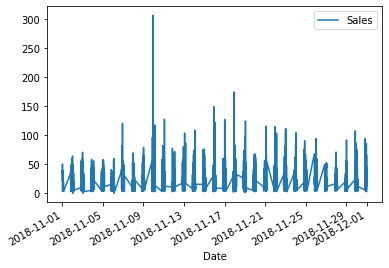

In [53]:
df.plot()

In [54]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [55]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [56]:
adfuller_test(df['Sales'])

ADF Test Statistic : -9.141386926368337
p-value : 2.8431200867783066e-15
#Lags Used : 30
Number of Observations Used : 4547
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


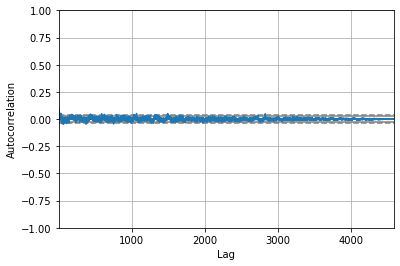

In [57]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [59]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [60]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 4577
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19352.409
Method:                       css-mle   S.D. of innovations             16.593
Date:                Wed, 10 Jun 2020   AIC                          38712.819
Time:                        00:30:40   BIC                          38738.534
Sample:                             1   HQIC                         38721.872
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0018      0.011      0.163      0.871      -0.020       0.024
ar.L1.D.Sales     0.0577      0.016      3.509      0.000       0.025       0.090
ma.L1.D.Sales    -0.9567      0.007   -138.667      0.000      -0.970      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           17.3303           +0.0000j           17.3303            0.0000
MA.1            1.0453           +0.0000j            1.0453            0.0000
-----------------------------------------------------------------------------
"""

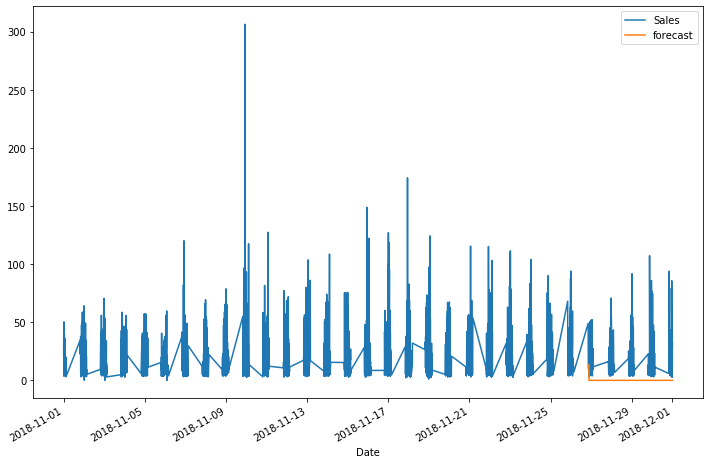

In [70]:
df['forecast']=model_fit.predict(start=4000,end=4577,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [71]:
df['forecast']=model_fit.predict(start=4000,end=4577,dynamic=True)
df[['Sales','forecast']].tail(20)

,Sales,forecast
Date,,
2018-11-30 23:33:02,34.02,0.001843
2018-11-30 23:36:10,16.74,0.001843
2018-11-30 23:36:43,2.55,0.001843
2018-11-30 23:37:49,40.76,0.001843
2018-11-30 23:39:03,30.01,0.001843
2018-11-30 23:39:43,21.55,0.001843
2018-11-30 23:40:40,30.39,0.001843
2018-11-30 23:41:55,22.33,0.001843
2018-11-30 23:43:16,21.85,0.001843


In [92]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,10))
results=model.fit()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MemoryError: Unable to allocate 18.5 MiB for an array with shape (23, 23, 4578) and data type float64

In [ ]:
df['forecast']=results.predict(start=4000,end=4577,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
df['Forecast']=results.predict(start=4000,end=4577,dynamic=True)
df[['Sales','Forecast']].tail(15)

In [99]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,48)]

In [100]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [101]:
future_datest_df.tail()

,Sales,forecast,Forecast
2019-01-12 23:59:54,NaN,NaN,NaN
2019-01-13 23:59:54,NaN,NaN,NaN
2019-01-14 23:59:54,NaN,NaN,NaN
2019-01-15 23:59:54,NaN,NaN,NaN
2019-01-16 23:59:54,NaN,NaN,NaN


In [102]:
future_df=pd.concat([df,future_datest_df])

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


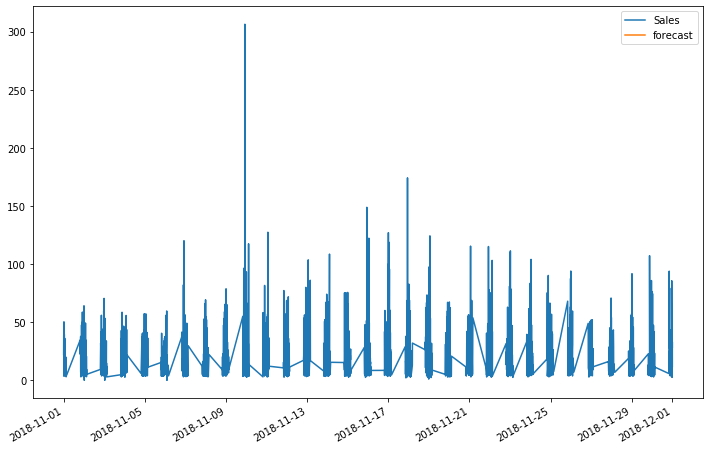

In [103]:
future_df['forecast'] = results.predict(start = 4500, end = 4601, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 